In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'cropped', 
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'cropped',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5452 images belonging to 3 classes.
Found 604 images belonging to 3 classes.


In [6]:
IMG_SIZE=(128,128)
conv_base = ResNet50(
    include_top=False,
    input_shape=IMG_SIZE + (3,),
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

In [7]:
model = conv_base.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.4)(model)
model = Dense(3, activation="softmax")(model)
model = Model(inputs=conv_base.input, outputs=model)
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)


Epoch 1/10
170/170 [==============================] - 437s 3s/step - loss: 0.3601 - accuracy: 0.8598 - val_loss: 1.5477 - val_accuracy: 0.3281
Epoch 2/10
170/170 [==============================] - 425s 3s/step - loss: 0.1301 - accuracy: 0.9517 - val_loss: 1.3578 - val_accuracy: 0.3368
Epoch 3/10
170/170 [==============================] - 848s 5s/step - loss: 0.1023 - accuracy: 0.9614 - val_loss: 1.0183 - val_accuracy: 0.5312
Epoch 4/10
170/170 [==============================] - 405s 2s/step - loss: 0.0707 - accuracy: 0.9729 - val_loss: 1.1031 - val_accuracy: 0.6059
Epoch 5/10
170/170 [==============================] - 416s 2s/step - loss: 0.0635 - accuracy: 0.9780 - val_loss: 0.5967 - val_accuracy: 0.7587
Epoch 6/10
170/170 [==============================] - 411s 2s/step - loss: 0.0415 - accuracy: 0.9851 - val_loss: 0.3371 - val_accuracy: 0.8750
Epoch 7/10
170/170 [==============================] - 4348s 26s/step - loss: 0.0509 - accuracy: 0.9808 - val_loss: 0.0960 - val_accuracy: 0.96

In [7]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


19/19 [==============================] - 8s 436ms/step - loss: 0.0293 - accuracy: 0.9884
Validation Accuracy: 98.84%


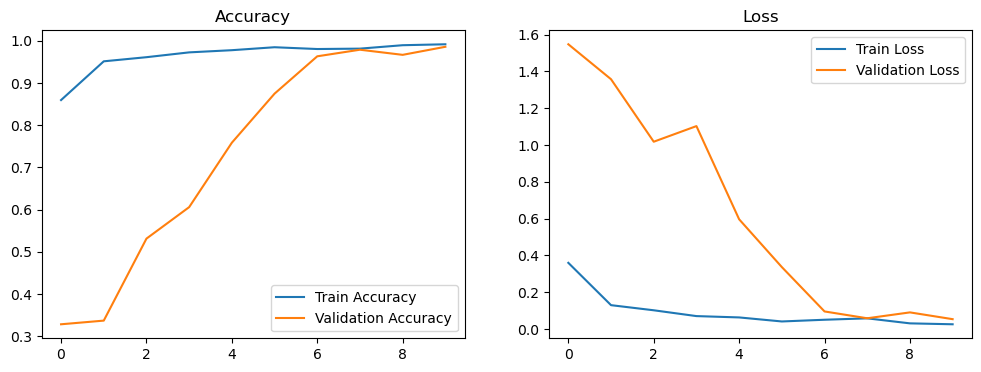

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [10]:
model.save('brain_tumor_resnet50.h5')


C:\Users\arnim\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
